In [1]:
# Imports for the file
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# get and format the data
names_file = 'data/adult.names'
names = {}
cols = []
with open(names_file) as f:
    for line in f:
        if (line[0] != '|' and line[0] != '>'):
            d_line = line.strip()
            if (len(d_line)):
                ldata = d_line[:-1].split(': ')
                p_opt = []
                for opt in ldata[1].split(', '):
                    p_opt.append(opt)
                names[ldata[0]] = p_opt
                cols.append(ldata[0])

cols.append('cash')
names['cash'] = ['>50K', '<=50K']
df_train = pd.read_csv('data/adult.data', index_col=False, names=cols)
df_test = pd.read_csv('data/adult.test', index_col=False, names=cols)
print(cols)
df_train = df_train.astype({
    'workclass': 'category',
    'education': 'category',
    'marital-status': 'category',
    'occupation': 'category',
    'relationship': 'category',
    'race': 'category',
    'sex': 'category',
    'native-country': 'category',
    'cash': 'category'
})
df_test = df_test.astype({
    'workclass': 'category',
    'education': 'category',
    'marital-status': 'category',
    'occupation': 'category',
    'relationship': 'category',
    'race': 'category',
    'sex': 'category',
    'native-country': 'category',
    'cash': 'category'
})

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'cash']


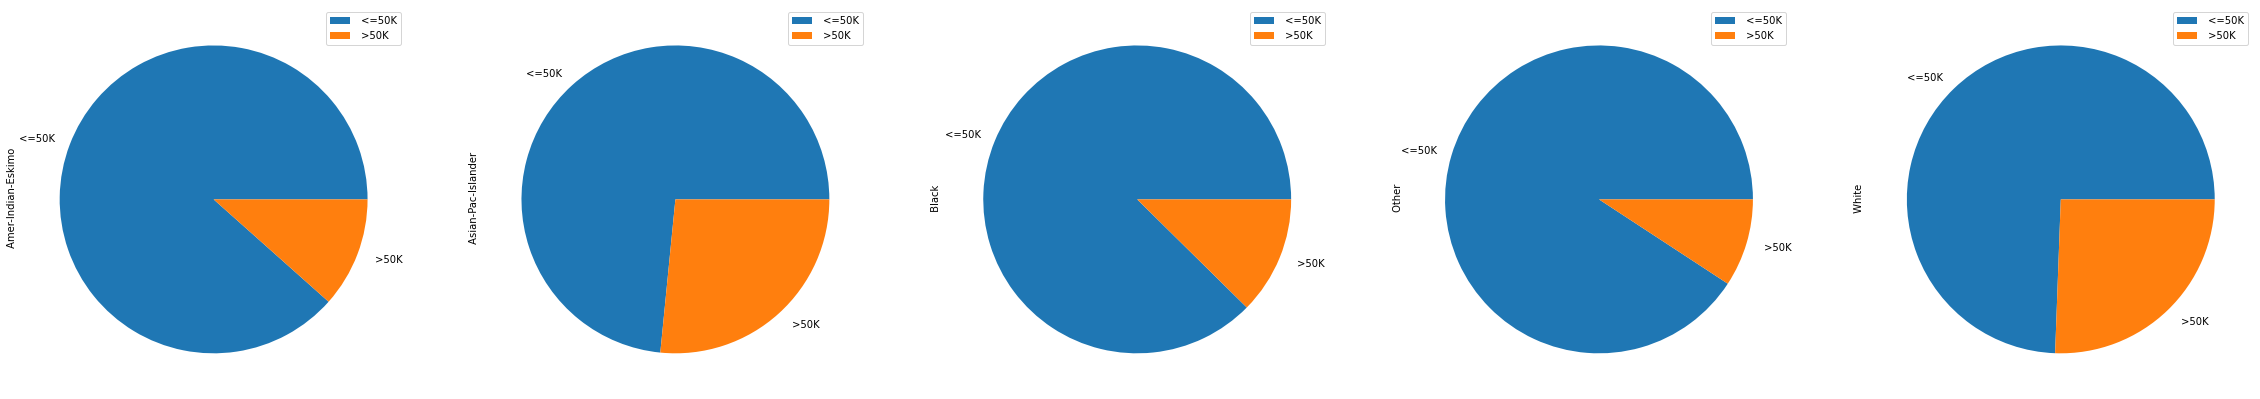

In [4]:
#start testing visualizations

rcross = pd.crosstab(df_train['race'], df_train['cash'])
plots = rcross.T.plot.pie(subplots=True, figsize=(40,30))


array([<AxesSubplot:ylabel=' Female'>, <AxesSubplot:ylabel=' Male'>],
      dtype=object)

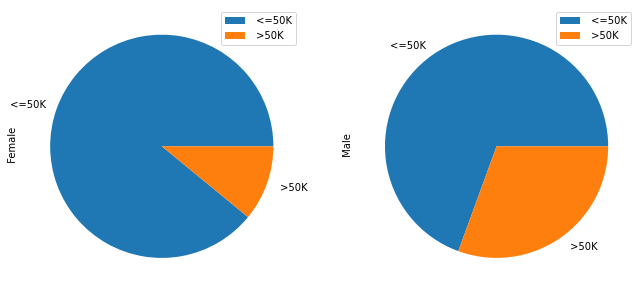

In [49]:
sexcross = pd.crosstab(df_train['sex'], df_train['cash'])
sexcross.T.plot.pie(subplots=True, figsize=(11,12))

In [21]:
# Race & Sex Visualizaitons
print(df_train[['sex', 'race', 'cash']])

           sex    race    cash
0         Male   White   <=50K
1         Male   White   <=50K
2         Male   White   <=50K
3         Male   Black   <=50K
4       Female   Black   <=50K
...        ...     ...     ...
32556   Female   White   <=50K
32557     Male   White    >50K
32558   Female   White   <=50K
32559     Male   White   <=50K
32560   Female   White    >50K

[32561 rows x 3 columns]


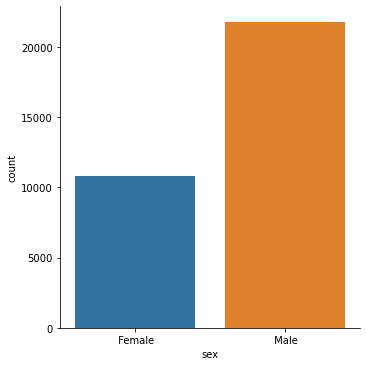

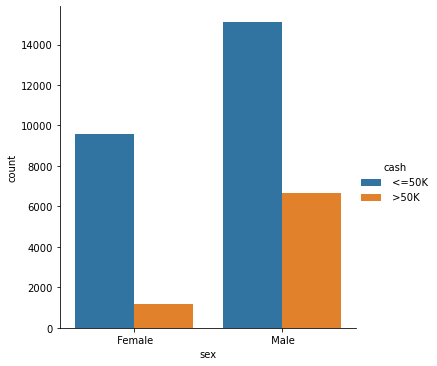

In [24]:
graph = sns.catplot(data=df_train, kind='count', x='sex')
graph1 = sns.catplot(data=df_train, kind='count', x='sex', hue='cash')

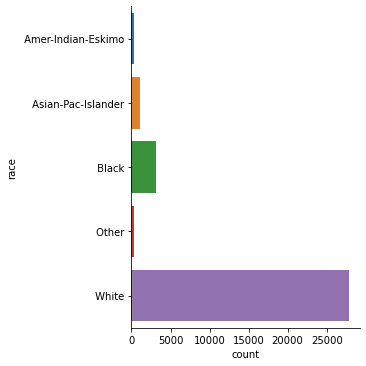

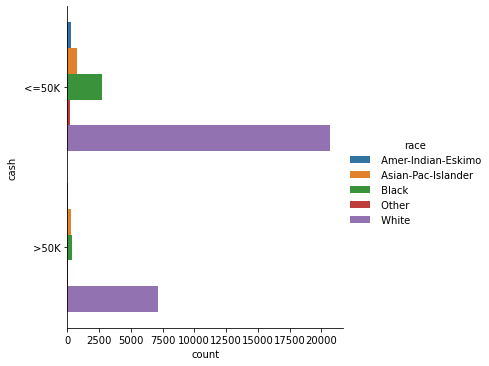

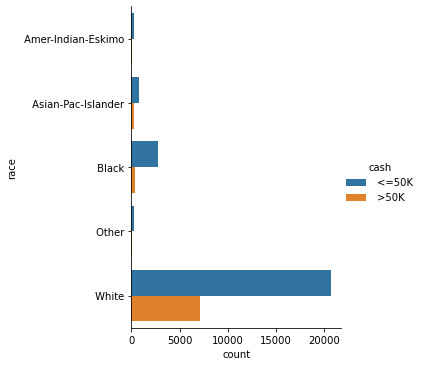

In [30]:
graph = sns.catplot(data=df_train, kind='count', y='race')
graph1 = sns.catplot(data=df_train, kind='count', y='cash', hue='race')
graph2 = sns.catplot(data=df_train, kind='count', y='race', hue='cash')

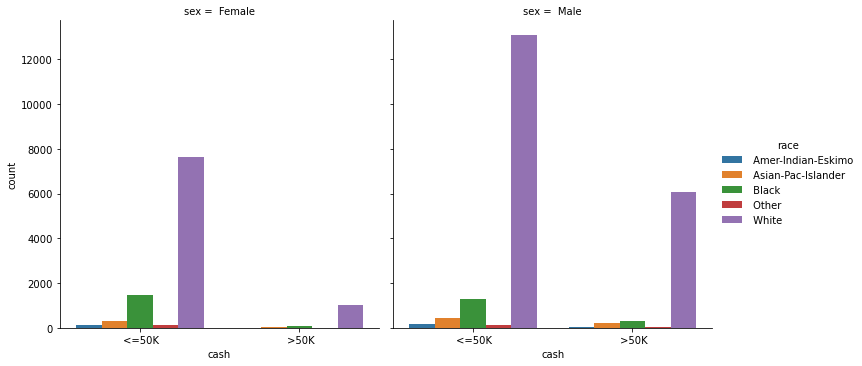

In [31]:
g = sns.catplot(data=df_train, kind='count', x='cash', col='sex', hue='race')

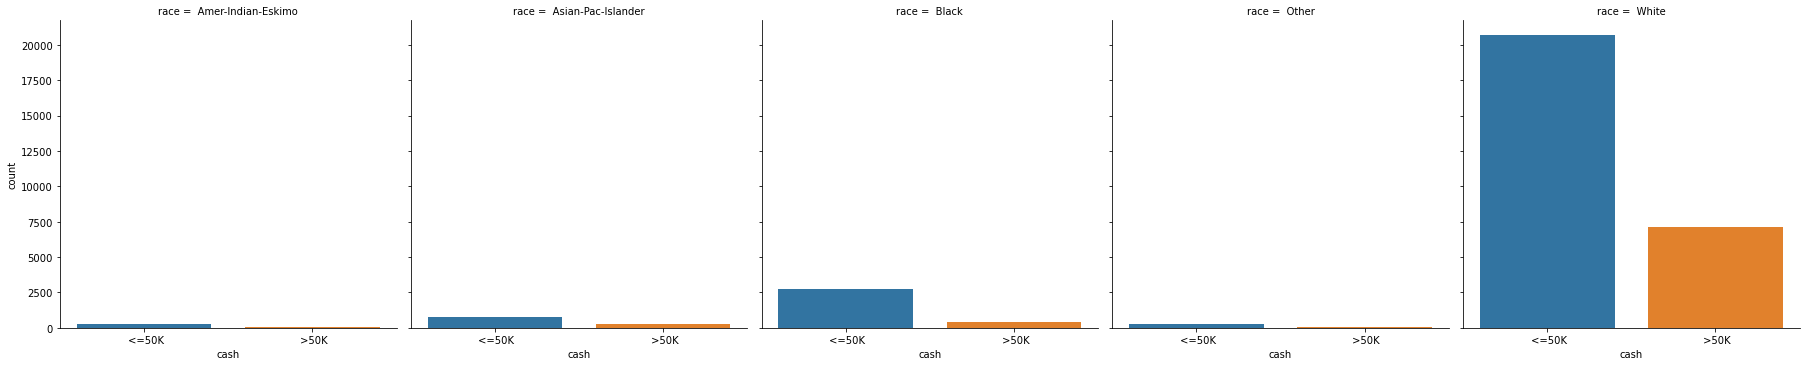

In [36]:
g = sns.catplot(data=df_train, kind='count', x='cash', col='race')

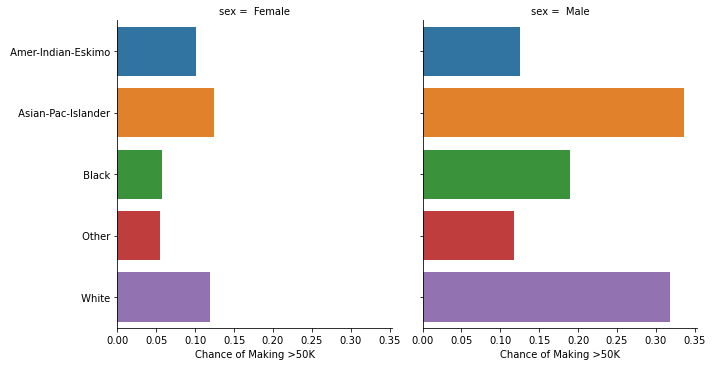

In [24]:
df_test = pd.factorize(df_train['cash'])[0]
train_test = df_train.copy()
train_test['cash'] = df_test
g = sns.catplot(data=train_test, y='race', col='sex', x='cash', kind='bar', ci=None)
g.set_axis_labels('Chance of Making >50K', '')

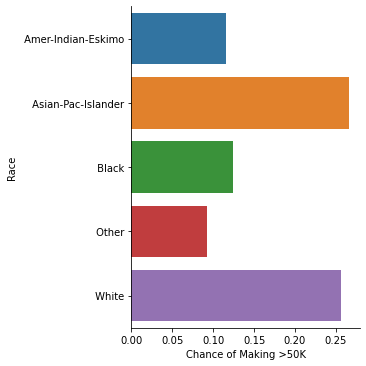

In [45]:
g = sns.catplot(data=train_test, y='race', x='cash', kind='bar', ci=None, palette="tab10")
g.set_axis_labels('Chance of Making >50K', 'Race')

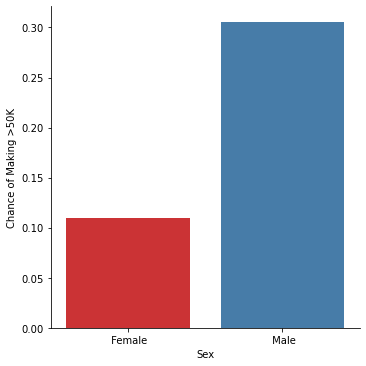

In [43]:
g = sns.catplot(data=train_test, x='sex', y='cash', kind='bar', ci=None, palette="Set1")
g.set_axis_labels('Sex', 'Chance of Making >50K')